In [1]:
from hydra import initialize, compose
from pathlib import Path
import pandas as pd

from peekingduck.training.src.utils.general_utils import (
    create_dataframe_with_image_info,
    download_to,
    extract_file,
    return_list_of_files,
)


/opt/homebrew/Caskroom/miniforge/base/envs/train/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_dir: Path = Path("data/vegfru5")
train_images = return_list_of_files(
    train_dir, extensions=[".jpg", ".png", ".jpeg"], return_string=False
)


In [3]:
len(train_images)

4755

In [4]:
df = pd.read_csv("data/vegfru/supvegfru_train.csv", delimiter=" ") # supvegfru_train.csv sub_classes.csv supvegfru_all.csv

In [5]:
df

,image_path,class_id
0,veg200_images/Chinese_artichoke/v_14_01_0001.jpg,13
1,veg200_images/Chinese_artichoke/v_14_01_0002.jpg,13
2,veg200_images/Chinese_artichoke/v_14_01_0003.jpg,13
3,veg200_images/Chinese_artichoke/v_14_01_0004.jpg,13
4,veg200_images/Chinese_artichoke/v_14_01_0005.jpg,13
...,...,...
43795,fru92_images/yacon/f_08_02_0146.jpg,24
43796,fru92_images/yacon/f_08_02_0147.jpg,24
43797,fru92_images/yacon/f_08_02_0148.jpg,24
43798,fru92_images/yacon/f_08_02_0149.jpg,24


In [6]:
df['image_path'] = df["image_path"].astype(str).apply(lambda x: "/".join(["data","vegfru",x]))

In [7]:
df

,image_path,class_id
0,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
1,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
2,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
3,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
4,data/vegfru/veg200_images/Chinese_artichoke/v_...,13
...,...,...
43795,data/vegfru/fru92_images/yacon/f_08_02_0146.jpg,24
43796,data/vegfru/fru92_images/yacon/f_08_02_0147.jpg,24
43797,data/vegfru/fru92_images/yacon/f_08_02_0148.jpg,24
43798,data/vegfru/fru92_images/yacon/f_08_02_0149.jpg,24


In [8]:
df['class_name'] = df["image_path"].astype(str).apply(lambda x: Path(x).parent.name)

In [9]:
df["class_name"].value_counts()

Chinese_artichoke    150
viola_philippica     150
zucchini             150
zizania_aquatica     150
zha-tsai             150
                    ... 
horst                150
hericium             150
hen-of-the-woods     150
head_cabbage         150
yacon                150
Name: class_name, Length: 292, dtype: int64

In [10]:
classes = [image.parent.name for image in train_images]

In [11]:
set(classes)

{'apple', 'banana', 'corn', 'garlic', 'termite_mushroom'}

In [12]:
vegfru5 = df.loc[df["class_name"].isin(set(classes))]

In [13]:
vegfru5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 5900 to 39699
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  750 non-null    object
 1   class_id    750 non-null    int64 
 2   class_name  750 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.4+ KB


In [14]:
df.loc[df["class_name"].isin(['apple'])]

,image_path,class_id,class_name
20500,data/vegfru/fru92_images/apple/f_10_01_0001.jpg,23,apple
20501,data/vegfru/fru92_images/apple/f_10_01_0002.jpg,23,apple
20502,data/vegfru/fru92_images/apple/f_10_01_0003.jpg,23,apple
20503,data/vegfru/fru92_images/apple/f_10_01_0004.jpg,23,apple
20504,data/vegfru/fru92_images/apple/f_10_01_0005.jpg,23,apple
...,...,...,...
39495,data/vegfru/fru92_images/apple/f_10_01_0146.jpg,23,apple
39496,data/vegfru/fru92_images/apple/f_10_01_0147.jpg,23,apple
39497,data/vegfru/fru92_images/apple/f_10_01_0148.jpg,23,apple
39498,data/vegfru/fru92_images/apple/f_10_01_0149.jpg,23,apple


In [18]:
vegfru5.sort_values(by="class_id", inplace=True)

/var/folders/p4/kcmtkxw53z54k341vwwykts80000gn/T/ipykernel_47072/3366390297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vegfru5.sort_values(by="class_id", inplace=True)


<AxesSubplot: >

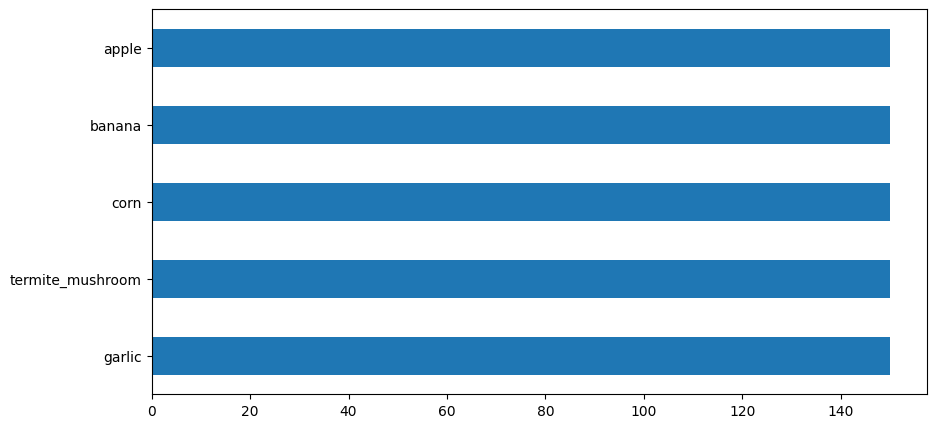

In [21]:
vegfru5["class_name"].value_counts().plot(kind='barh',figsize=(10,5))


In [22]:
vegfru5.to_csv('vegfru5.csv', index=False)